# How I know my 3D model is not working?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
pd.set_option('display.float_format', lambda x: '%.10f' % x)

import sys # https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook/53052990
sys.path.append('..')

import importlib #https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart
                 #https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive

import analisis
#%matplotlib widget

In [2]:
importlib.reload(analisis)

<module 'analisis' from '/home/m/Documents/marine_surveys_edition/comparing/analisis.py'>

# Read models


In [3]:
##  Constricciones en mar corregidas con valores de logaritmo (Parra)
model_12637 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_4_fix/0.1/to_voxler_marcluster1.dat_12637.csv')
model_12638 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_4_fix/0.5/to_voxler_marcluster1.dat_12638.csv')
model_12639 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_4_fix/0.01/to_voxler_marcluster1.dat_12639.csv')
model_12640 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_4_fix/0.001/to_voxler_marcluster1.dat_12640.csv')

##  Constricciones en mar a partir de histograma sin constricción
model_12751 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_new_sea/ptm_new_sea_0.1/to_voxler_marcluster1.dat_12751.csv')
model_12752 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_new_sea/ptm_new_sea_0.5/to_voxler_marcluster1.dat_12752.csv')

## Sin constricciones
model_12410 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_1/output/to_voxler_marcluster1.dat_12410.csv') 
model_12601 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_1_0.5/to_voxler_marcluster1.dat_12601.csv')
model_12641 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_1_0.01/to_voxler_marcluster1.dat_12641.csv')
model_12642 = pd.read_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_tt/ptm_tt_1_0.001/to_voxler_marcluster1.dat_12642.csv')

# Parejas a comparar 

## 12751 -12410

12751 (constriccion en mar basadas en rectangulo salado característico con b=0.1) con 12410 (sin constriccion en mar con b=0.1)

In [4]:
model_12751.describe()

,id,easting,northing,depth,log_appres_cal,linear_appres_cal
count,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000
mean,15510.5000000000,400.0000000000,550.0000000000,-15.5000000000,-0.1186264646,0.9713386328
std,8382.7296815829,230.8737578313,317.4981750597,12.4969818064,0.3065296555,0.6796632749
min,1059.0000000000,10.0000000000,10.0000000000,-40.0000000000,-0.7230000000,0.1892343619
25%,8216.7500000000,205.0000000000,270.0000000000,-22.5000000000,-0.4850000000,0.3273406949
50%,15510.5000000000,400.0000000000,550.0000000000,-12.5000000000,-0.1060000000,0.7834296428
75%,22804.2500000000,595.0000000000,830.0000000000,-5.0000000000,0.1470000000,1.4028137046
max,29962.0000000000,790.0000000000,1090.0000000000,-1.0000000000,0.5780000000,3.7844258472


In [5]:
model_12410.describe()

,id,easting,northing,depth,log_appres_cal,linear_appres_cal
count,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000,19800.0000000000
mean,15510.5000000000,400.0000000000,550.0000000000,-15.5000000000,-0.0876267677,0.9969847464
std,8382.7296815829,230.8737578313,317.4981750597,12.4969818064,0.2784034309,0.6280063718
min,1059.0000000000,10.0000000000,10.0000000000,-40.0000000000,-0.7460000000,0.1794733627
25%,8216.7500000000,205.0000000000,270.0000000000,-22.5000000000,-0.3180000000,0.4808393484
50%,15510.5000000000,400.0000000000,550.0000000000,-12.5000000000,-0.0820000000,0.8279421637
75%,22804.2500000000,595.0000000000,830.0000000000,-5.0000000000,0.1440000000,1.3931568029
max,29962.0000000000,790.0000000000,1090.0000000000,-1.0000000000,0.5410000000,3.4753616144


In [6]:
print('#datos modelo completo= ', len(model_12751), '#datos modelo shallow = ',len(analisis.shallow(model_12751)))

#datos modelo completo=  19800 #datos modelo shallow =  6600


### ¿Cómo se ve la resistividad lineal a lo largo de los modelos con /sin constricción para z=[-1,-3,-5]?

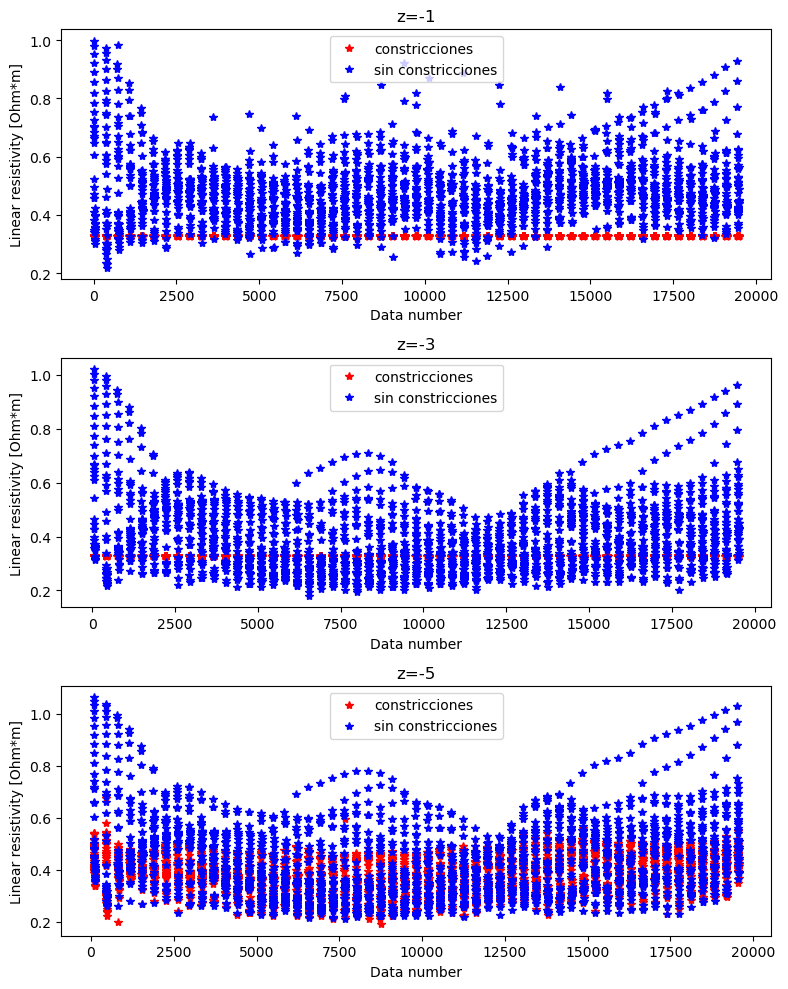

In [7]:
analisis.compara(analisis.shallow(model_12751),'constricciones',analisis.shallow(model_12410),'sin constricciones',1,19800)

Si la gráfica sin constricción tiene un valor más alto de resistividad,
significa que es un poco más "dulce" que la gráfica sin constricción
Si hago el cociente constriccion (12751) /sin constriccion (12410) = chiquito/grande esto será menos a 1 en los puntos donde hay más desviación del agua salada
al hacer la resta 

### ¿Qué nos dice la resta y cociente de los modelos con y sin constricción, en todo el modelo y en el rectángulo salado?

In [8]:
#Comparar sin constricciones vs constricciones en mar y ojos
model_compared_12751_12410 = model_12751.copy()
# CONSTRICCION - SIN CONSTRICCION
model_compared_12751_12410['diferencia']= model_12751['linear_appres_cal']- model_12410['linear_appres_cal']
# CONSTRICCION / SIN CONSTRICCION
model_compared_12751_12410['cociente']= (model_12751['linear_appres_cal']/model_12410['linear_appres_cal'])
model_compared_12751_12410 = model_compared_12751_12410.drop(columns=['log_appres_cal','linear_appres_cal'])


Extraer la región característica "salada"

In [9]:
rectangulo_salado = analisis.region_salada(model_compared_12751_12410)

### Visualizar las diferencias

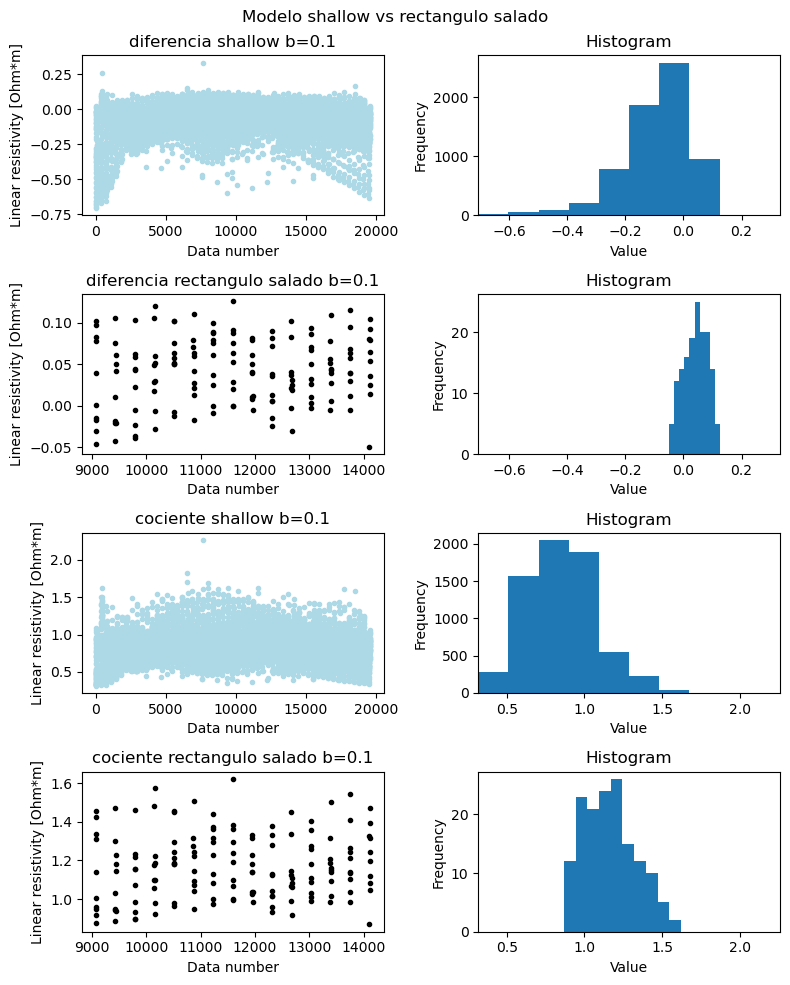

In [10]:
analisis.restas_cocientes(analisis.shallow(model_compared_12751_12410),rectangulo_salado,'shallow b=0.1' ,'rectangulo salado b=0.1' , 'Modelo shallow vs rectangulo salado')

Interesan los valores donde la resta es negativa y/o el cociente es menor que 1. Para establecer esos límites, vemos los valores mínimos y máximos en el recuadro salado

In [11]:
rectangulo_salado.describe()

,id,easting,northing,depth,diferencia,cociente
count,150.0000000000,150.0000000000,150.0000000000,150.0000000000,150.0000000000,150.0000000000
mean,18028.5000000000,600.0000000000,650.0000000000,-3.0000000000,0.0413120937,1.1682669748
std,2288.8648420343,57.6380746643,86.6993571112,0.0000000000,0.0408831578,0.1699640898
min,14328.0000000000,510.0000000000,510.0000000000,-3.0000000000,-0.0493631041,0.8689604293
25%,15919.2500000000,550.0000000000,570.0000000000,-3.0000000000,0.0105661936,1.0333565960
50%,18028.5000000000,600.0000000000,650.0000000000,-3.0000000000,0.0415816405,1.1455129414
75%,20137.7500000000,650.0000000000,730.0000000000,-3.0000000000,0.0749926176,1.2971792710
max,21729.0000000000,690.0000000000,790.0000000000,-3.0000000000,0.1255040585,1.6218100974


Esta función filtra el dataframe para excluir los datos que pertenecen al comportamiento del rectángulo salado

In [12]:
filter_model_compared_12751_12410=analisis.filter_based_rectangulo_min_max(analisis.shallow(model_compared_12751_12410))

Volvemos a graficar los histogramas para ver si funcionó el filtro

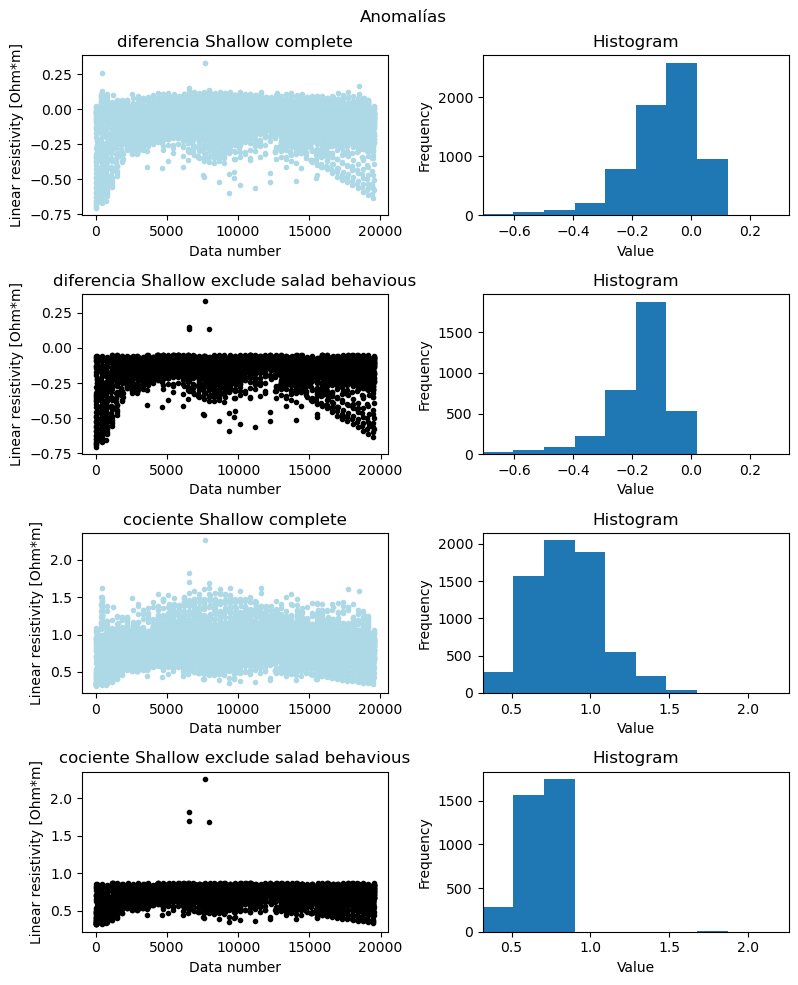

In [13]:
analisis.restas_cocientes(analisis.shallow(model_compared_12751_12410),filter_model_compared_12751_12410,'Shallow complete','Shallow exclude salad behavious','Anomalías')

In [14]:
filter_model_compared_12751_12410.to_csv('/home/m/Documents/cluster_resultados/perl5/ptm_intel/ptm_new_sea/anomalies_12751_12410.csv')

In [17]:
print('#datos modelo completo= ',len(model_12751),'\n',
      '#datos modelo shallow = ',len(analisis.shallow(model_12751)),'\n',
      '#datos modelo selecting anomalies = ',len(analisis.shallow(filter_model_compared_12751_12410)))

#datos modelo completo=  19800 
 #datos modelo shallow =  6600 
 #datos modelo selecting anomalies =  3596


In [ ]:
0.3235936569, 0.8689604293

In [22]:
filter_model_compared_12751_12410[filter_model_compared_12751_12410['depth'].isin([-5])].describe()

,id,easting,northing,depth,diferencia,cociente
count,719.0000000000,719.0000000000,719.0000000000,719.0000000000,719.0000000000,719.0000000000
mean,14312.9165507650,297.6773296245,508.1641168289,-5.0000000000,-0.1561766304,0.7575518391
std,9645.6045269027,234.8164136224,365.4568946270,0.0000000000,0.1062305263,0.1115462701
min,1147.0000000000,10.0000000000,10.0000000000,-5.0000000000,-0.6631999189,0.3810658234
25%,4881.5000000000,110.0000000000,150.0000000000,-5.0000000000,-0.1732414575,0.7161434102
50%,12764.0000000000,230.0000000000,450.0000000000,-5.0000000000,-0.1291541385,0.7744617978
75%,23853.5000000000,410.0000000000,870.0000000000,-5.0000000000,-0.0920154395,0.8260379496
max,29687.0000000000,790.0000000000,1090.0000000000,-5.0000000000,0.3320290049,2.2594357702
